In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, Input
from keras.models import Model
from keras import optimizers, initializers, regularizers, metrics, callbacks
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

In [2]:
cifar10 = datasets.cifar10

In [3]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [6]:
train_images = train_images/255.0
test_images = test_images/255.0

In [7]:
x = np.concatenate((train_images, test_images))
y = np.concatenate((train_labels, test_labels))

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state = 42) # train / test 분할

In [8]:
train_input, val_input, train_target, val_target = train_test_split(x_train, y_train, test_size = 0.1,
                                                                    random_state = 42) # train / val 분할

In [9]:
print(train_input.shape, train_target.shape, val_input.shape, val_target.shape)

(48600, 32, 32, 3) (48600, 1) (5400, 32, 32, 3) (5400, 1)


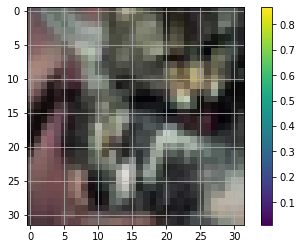

In [10]:
plt.figure()
plt.imshow(train_input[0])
plt.colorbar()
plt.grid(True)
plt.show()

In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(train_input.shape[1:])
                        ))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(class_names), activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 1024)             

In [12]:
checkpoint = ModelCheckpoint(filepath='My_weight.h5', 
            monitor='val_loss', 
            mode='min', 
            save_best_only=True)

In [28]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(lr = 5e-5), metrics=['accuracy'])

checkpoint_cb=callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
early_stopping_cb=callbacks.EarlyStopping(patience=2,restore_best_weights=True)

history=model.fit(train_input,train_target,epochs=100, validation_data=(val_input,val_target),
                  callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
1519/1519 [==============================] - 6s 4ms/step - loss: 0.4690 - accuracy: 0.8384 - val_loss: 0.8045 - val_accuracy: 0.7296
Epoch 2/100
1519/1519 [==============================] - 5s 4ms/step - loss: 0.4626 - accuracy: 0.8414 - val_loss: 0.8040 - val_accuracy: 0.7265
Epoch 3/100
1519/1519 [==============================] - 5s 4ms/step - loss: 0.4576 - accuracy: 0.8433 - val_loss: 0.8071 - val_accuracy: 0.7296
Epoch 4/100
1519/1519 [==============================] - 5s 4ms/step - loss: 0.4521 - accuracy: 0.8446 - val_loss: 0.8060 - val_accuracy: 0.7313


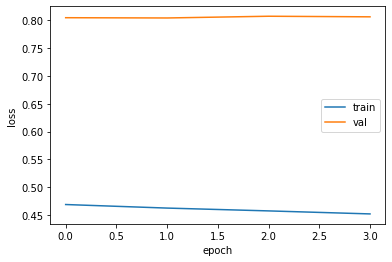

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [30]:
model.evaluate(val_input,val_target)

169/169 [==============================] - 0s 2ms/step - loss: 0.8040 - accuracy: 0.7265


[0.803989052772522, 0.7264814972877502]